In [1]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
class Pocket:
    #apprentissage
    def fit(self, X, y, n_iter=100):
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        self.weights = np.zeros((n_features+1,))
        w = np.zeros((n_features+1,))
        X = np.concatenate([X, np.ones((n_samples,1))], axis=1)   
        for i in range(n_iter):
            for j in range(n_samples):
                if y[j]*np.dot(w, X[j, :]) <= 0:
                    w += y[j]*X[j,:]
                  
                    if self.eval(X, y, w) >= self.eval(X, y, self.weights) :
                        self.weights = [w[i] for i in range(len(w))]
    
    
    #prediction                     
    def predict(self, X):

        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return

        n_samples = X.shape[0]
        #Add column of 1s
        X = np.concatenate([X, np.ones((n_samples, 1))], axis=1) 
        y = np.matmul(X, self.weights)
        y = np.vectorize(lambda val: 1 if val>0 else -1)(y)
        return y
    
    #Evaluation(scoring)
    def score(self, X, y):
        pred_y = self.predict(X)
        return np.mean(y == pred_y)
    
    
    def eval(self, X, y, weights):
        #prediction
        if not hasattr(self, 'weights'):
            print('The model is not trained yet!')
            return 
        n_samples = X.shape[0]
        # Add column of 1s
        pred_y = np.matmul(X, weights)
        pred_y = np.vectorize(lambda val: 1 if val > 0 else -1)(pred_y)
        #score
        return np.mean(y == pred_y) 

In [3]:
#Fonction de Plot
def draw(X,y,a,ax):
    ax.scatter(X[:,0], X[:,1],marker='o',c=y)


    x0_1 = np.amin(X[:,0])
    x0_2 = np.amax(X[:,0])

    x1_1 = (-a.weights[2] - a.weights[0]* x0_1 ) / a.weights[1]
    x1_2 = (-a.weights[2] - a.weights[0]* x0_2 ) / a.weights[1]

    ax.plot([x0_1, x0_2],[x1_1, x1_2])

In [4]:
#creation de données
X, y = make_classification(
        n_features=2,
        n_classes=2,
        n_samples=200,
        n_redundant=0,
        n_clusters_per_class=1,
        random_state=175,
        class_sep=2
)

In [5]:
y_ = np.vectorize(lambda val: 1 if val > 0 else -1)(y)


X_train, X_test, y_train, y_test = train_test_split( X, y_, test_size=0.2, random_state=715)


p=Pocket()
p.fit(X_train, y_train)

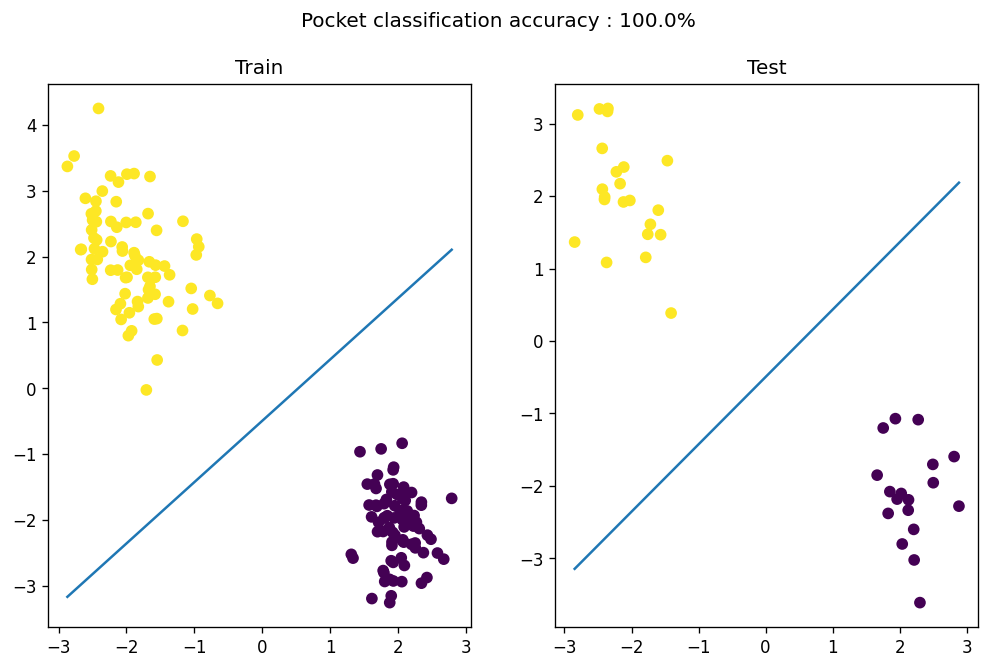

In [6]:
#configuration de plot
fig, (ax_train, ax_test) = plt.subplots(nrows=1, ncols=2, dpi=120, figsize=(10,6))
ax_train.set_title('Train')
ax_test.set_title('Test')
plt.suptitle("Pocket classification accuracy : "+str(p.score(X_test, y_test)*100)+"%")
draw(X_train,y_train,p,ax_train)
draw(X_test,y_test,p,ax_test)
plt.show()
plt.close(fig)